In [184]:
import numpy as np
from cmath import sqrt
import matplotlib.pyplot as plt
import sympy as sp
from numpy.linalg import pinv

%matplotlib widget

# Inversion of the eigenstate matrix

In [147]:
k = sp.Symbol('ka')
a = (4.+2.*sp.cos(k))**0.5
b = ((1+sp.cos(k))/(4.+2*sp.cos(k)))**0.5

In [148]:
M = sp.ImmutableDenseMatrix([[(1+sp.exp(-1.j*k))/a,-sp.sqrt(2)/a],
               [b*(1+sp.exp(-1.j*k))/(1+sp.cos(k)),-b*sp.sqrt(2)]])

In [149]:
M.simplify()
M

Matrix([
[                          0.5*(1 + exp(-1.0*I*ka))/(0.5*cos(ka) + 1)**0.5,             -0.5*sqrt(2)/(0.5*cos(ka) + 1)**0.5],
[((cos(ka) + 1)/(2*cos(ka) + 4.0))**0.5*(1 + exp(-1.0*I*ka))/(cos(ka) + 1), -sqrt(2)*((cos(ka) + 1)/(2*cos(ka) + 4.0))**0.5]])

In [151]:
C = M.inv()
C

Matrix([
[(0.5*(0.5*cos(ka) + 1)**0.5*exp(3.0*I*ka)*cos(ka) + 0.5*(0.5*cos(ka) + 1)**0.5*exp(3.0*I*ka) + 0.5*(0.5*cos(ka) + 1)**0.5*exp(4.0*I*ka)*cos(ka) + 0.5*(0.5*cos(ka) + 1)**0.5*exp(4.0*I*ka))/(0.25*exp(2.0*I*ka)*cos(ka) + 0.5*exp(3.0*I*ka)*cos(ka) + 0.25*exp(4.0*I*ka)*cos(ka)), (-0.25*exp(2.0*I*ka)*cos(ka) - 0.25*exp(2.0*I*ka) - 0.25*exp(3.0*I*ka)*cos(ka) - 0.25*exp(3.0*I*ka))/(0.25*(cos(ka)/(2*cos(ka) + 4.0) + 1/(2*cos(ka) + 4.0))**0.5*exp(1.0*I*ka)*cos(ka) + 0.5*(cos(ka)/(2*cos(ka) + 4.0) + 1/(2*cos(ka) + 4.0))**0.5*exp(2.0*I*ka)*cos(ka) + 0.25*(cos(ka)/(2*cos(ka) + 4.0) + 1/(2*cos(ka) + 4.0))**0.5*exp(3.0*I*ka)*cos(ka))],
[                                                                                                                                                                                                                                       1.0*sqrt(2)*(0.5*cos(ka) + 1)**0.5/cos(ka),                                                                                      

# $m_{11}$

In [2]:
def m11(k):
    
    x = -sqrt(2)*(np.exp(2j*k) + np.exp(3j*k))
    x *= 1 + 1/np.cos(k)
    x *= sqrt(1.+2.*np.cos(k))
    x /= (2*np.exp(1.j*k) + 4*np.exp(2j*k) + 2*np.exp(3j*k))
    
    return x

In [3]:
m11 = np.vectorize(m11)

In [4]:
t = np.linspace(-np.pi+0.01,np.pi-0.01,50)

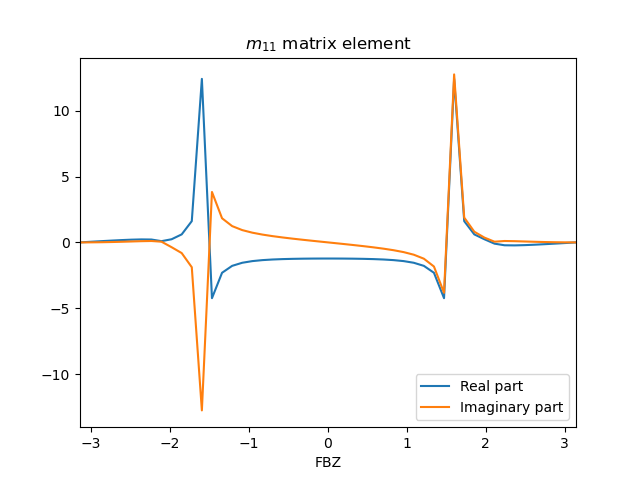

In [66]:
fig = plt.figure()

plt.plot(t,np.real(m11(t)), label="Real part")
plt.plot(t,np.imag(m11(t)), label="Imaginary part")

plt.title(r"$m_{11}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m11.pdf")
plt.show()

# $m_{12}$

In [68]:
def m12(k):
    
    x = sqrt(2)*(np.exp(1j*k) + np.exp(2j*k))
    x *= 1 + 1/np.cos(k)
    x *= sqrt(2.+np.cos(k))
    x /= (4*np.exp(1.j*k) + 2*np.exp(2j*k) + 2)
    x /= sqrt(1+np.sin(k))
    
    return x

In [69]:
m12 = np.vectorize(m12)

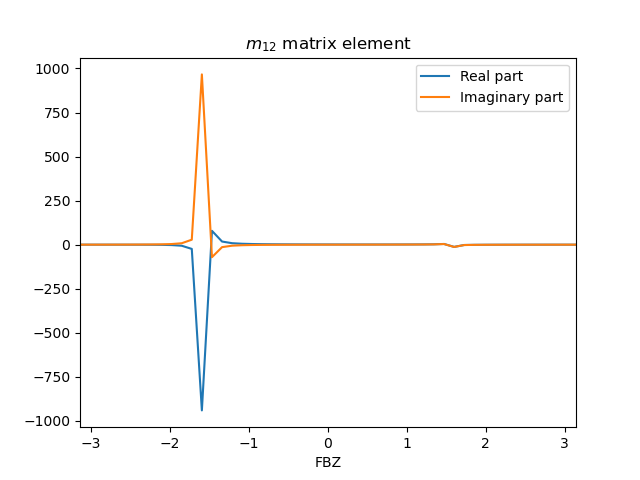

In [70]:
fig = plt.figure()

plt.plot(t,np.real(m12(t)), label="Real part")
plt.plot(t,np.imag(m12(t)), label="Imaginary part")

plt.title(r"$m_{12}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m12.pdf")
plt.show()

# $m_{21}$

In [7]:
def m21(k):
    
    x = -sqrt(1+2*np.cos(k))
    x /= np.cos(k)
    
    return x

In [8]:
m21 = np.vectorize(m21)

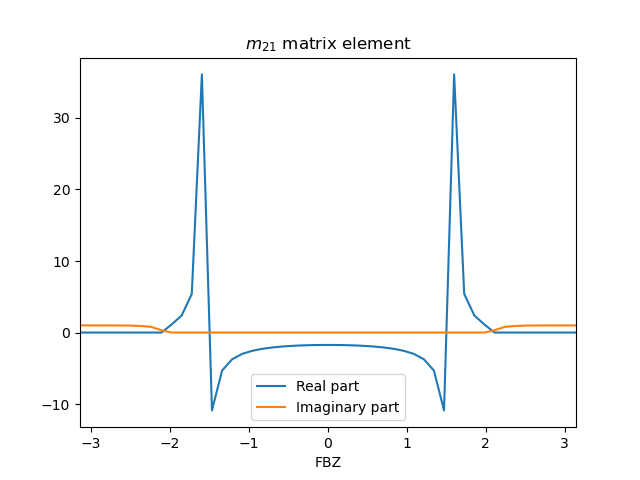

In [76]:
fig = plt.figure()

plt.plot(t,np.real(m21(t)), label="Real part")
plt.plot(t,np.imag(m21(t)), label="Imaginary part")

plt.title(r"$m_{21}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m21.pdf")
plt.show()

# $m_{22}$

In [9]:
def m22(k):
    
    x = 1 + 1/np.cos(k)
    x *= sqrt(2+np.cos(k))
    x /= sqrt(1 + np.cos(k))
    
    return x

In [10]:
m22 = np.vectorize(m22)

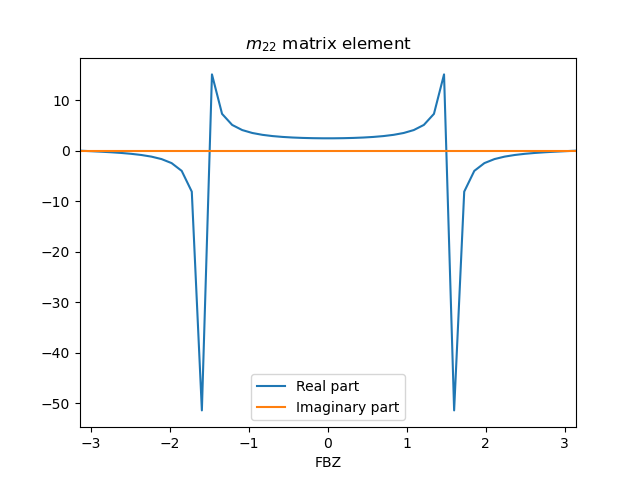

In [80]:
fig = plt.figure()

plt.plot(t,np.real(m22(t)), label="Real part")
plt.plot(t,np.imag(m22(t)), label="Imaginary part")

plt.title(r"$m_{22}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m22.pdf")
plt.show()

# Self-energy

In [57]:
def slfen(z,N,g,eta=0.):
    
    k = np.linspace(-np.pi+0.00001,np.pi-0.00001,N)
    om_a = 2.*np.ones(N)
    om_b = -2*(1+np.cos(k))
    z = z*np.ones(N)
    
    Sigma = np.sum(np.abs(m12(k))**2/(z-om_b+1.j*eta))
    Sigma += np.sum((np.abs(m11(k))**2)/(z-om_a+1.j*eta))
    return Sigma*(g**2)/N

In [58]:
slfen = np.vectorize(slfen)

In [59]:
N = 400
g = 0.1
E = np.linspace(-4.5,2.5,1000)

res = slfen(E,400,0.1,-2*np.pi/400)

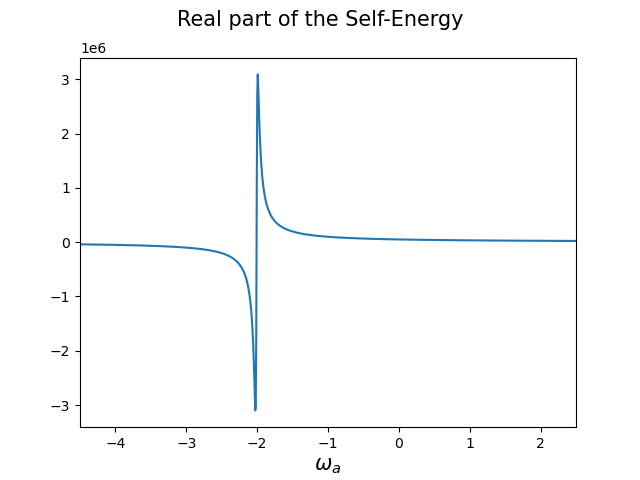

In [65]:
fig = plt.figure()

plt.suptitle("Real part of the Self-Energy",fontsize=15)

plt.plot(E,np.real(res))
plt.xlabel(r"$\omega_a$",fontsize=15)

plt.xlim(E[0],E[-1])
#plt.xlim(1.9,2.1)

plt.show()

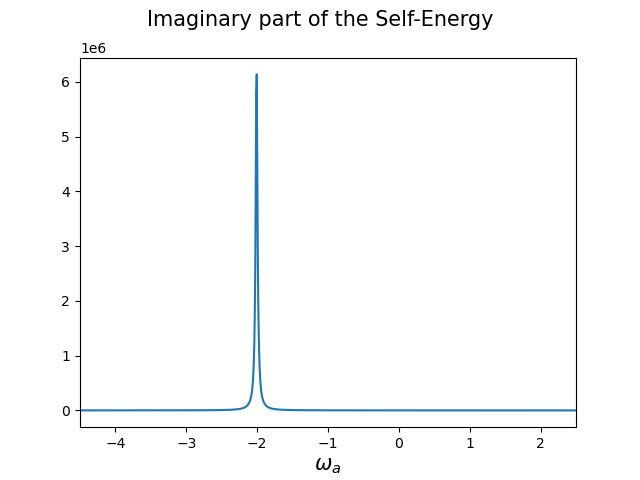

In [61]:
fig = plt.figure()

plt.suptitle("Imaginary part of the Self-Energy",fontsize=15)

plt.plot(E,np.imag(res))
plt.xlabel(r"$\omega_a$",fontsize=15)

plt.xlim(E[0],E[-1])

plt.show()

Write some comments here

In [212]:
N = 200
CtS = np.zeros((N,2*N))

base = np.zeros(2*N)
base[0] = 1.
base[2] = 1.
base[3] = -np.sqrt(2)
for i in range(1,N,1):
    CtS[i,:] = np.roll(base,2*(i-1))
CtS[0,0] = 1.
CtS[0,1] = -np.sqrt(2)
CtS[0,-1] = 1.

CtS *= 0.5

In [213]:
StC = pinv(CtS)

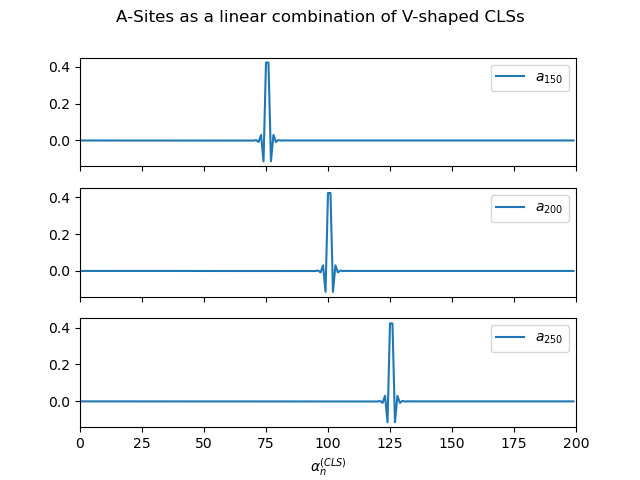

In [214]:
fig,ax = plt.subplots(nrows=3,ncols=1,sharex=True)

plt.suptitle("A-Sites as a linear combination of V-shaped CLSs")

n = 150
ax[0].plot(StC[n],label="$a_{150}$")
n = 200
ax[1].plot(StC[n],label="$a_{200}$")
n = 250
ax[2].plot(StC[n],label="$a_{250}$")

plt.xlabel(r"$\alpha^{(CLS)}_n$")
plt.xlim(0,200)

for i in range(3):
    ax[i].legend()
plt.show()

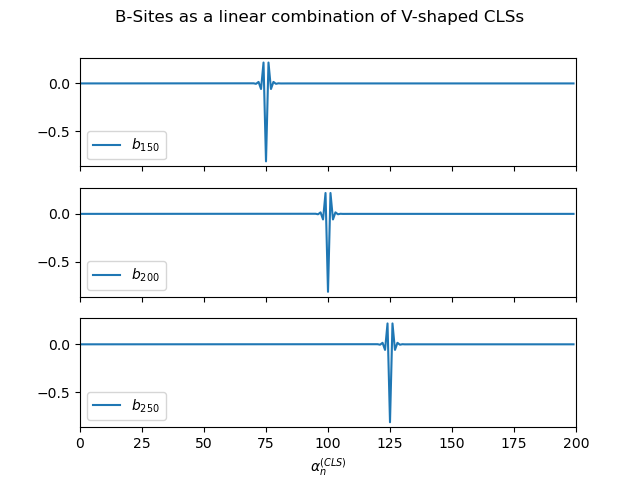

In [215]:
fig,ax = plt.subplots(nrows=3,ncols=1,sharex=True)

plt.suptitle("B-Sites as a linear combination of V-shaped CLSs")

n = 151
ax[0].plot(StC[n],label="$b_{150}$")
n = 201
ax[1].plot(StC[n],label="$b_{200}$")
n = 251
ax[2].plot(StC[n],label="$b_{250}$")

plt.xlabel(r"$\alpha^{(CLS)}_n$")
plt.xlim(0,200)

for i in range(3):
    ax[i].legend()
plt.show()

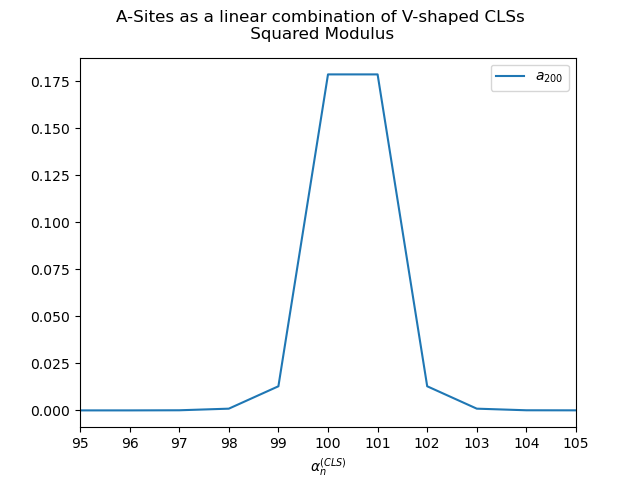

In [216]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True)

plt.suptitle("A-Sites as a linear combination of V-shaped CLSs\n Squared Modulus")

n = 200
ax.plot(np.abs(StC[n])**2,label="$a_{200}$")

plt.xlabel(r"$\alpha^{(CLS)}_n$")
plt.xlim(95,105)

ax.legend()
ax.set_xticks(np.arange(95,106,1))
plt.show()

In [223]:
StC[200,98:103]**2

array([0.00092081, 0.01282526, 0.17863279, 0.17863279, 0.01282526])